# PREDICTIVE MODELING AND MACHINE LEARNING ASSIGNMENT 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import date
from datetime import datetime
import seaborn as sn
%matplotlib inline

In [3]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape ,test.shape

((12980, 12), (4399, 11))

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [8]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [10]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

(array([3.760e+03, 1.797e+03, 1.551e+03, 1.415e+03, 1.110e+03, 8.030e+02,
        6.390e+02, 4.740e+02, 3.960e+02, 2.700e+02, 2.230e+02, 1.820e+02,
        1.410e+02, 7.800e+01, 6.100e+01, 2.700e+01, 3.000e+01, 1.700e+01,
        5.000e+00, 1.000e+00]),
 array([  1. ,  48.8,  96.6, 144.4, 192.2, 240. , 287.8, 335.6, 383.4,
        431.2, 479. , 526.8, 574.6, 622.4, 670.2, 718. , 765.8, 813.6,
        861.4, 909.2, 957. ]),
 <BarContainer object of 20 artists>)

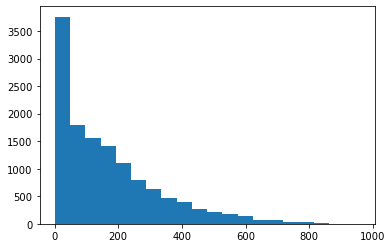

In [11]:
plt.hist(train['count'],bins=20)

(array([ 149.,    0.,  190.,  193.,  401.,  334.,  431.,  315.,  412.,
         561.,  579.,  678.,  934., 1248., 1514., 1739., 1448., 1105.,
         622.,  127.]),
 array([0.        , 0.34319017, 0.68638034, 1.02957051, 1.37276068,
        1.71595085, 2.05914102, 2.40233119, 2.74552136, 3.08871153,
        3.4319017 , 3.77509187, 4.11828203, 4.4614722 , 4.80466237,
        5.14785254, 5.49104271, 5.83423288, 6.17742305, 6.52061322,
        6.86380339]),
 <BarContainer object of 20 artists>)

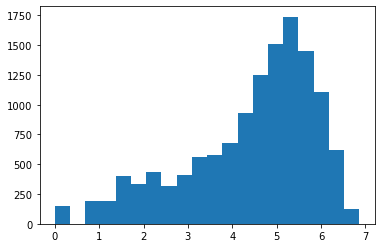

In [12]:
plt.hist(np.log(train['count']),bins=20)

C:\Users\Sourabh Sengar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

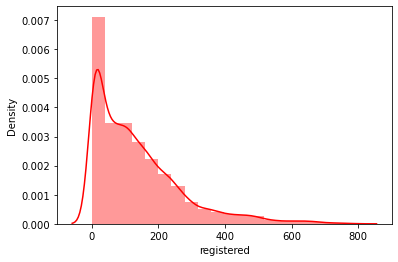

In [13]:
sn.distplot(train['registered'],bins=20,color='r')

In [14]:
#Bivariate analysis

corr=train[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

In [15]:
corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.991839,-0.048478,-0.008669,0.459414,0.344451,0.415938
atemp,0.991839,1.000000,-0.031606,-0.049997,0.454015,0.342345,0.412644
humidity,-0.048478,-0.031606,1.000000,-0.296975,-0.320253,-0.279501,-0.322269
windspeed,-0.008669,-0.049997,-0.296975,1.000000,0.079524,0.100579,0.105607
casual,0.459414,0.454015,-0.320253,0.079524,1.000000,0.509175,0.707938
registered,0.344451,0.342345,-0.279501,0.100579,0.509175,1.000000,0.968329
count,0.415938,0.412644,-0.322269,0.105607,0.707938,0.968329,1.000000


In [16]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
#lets work on extracting date,month and hours with the help of datetime


train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [18]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [19]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [20]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# Model Building With Linear Regression 



In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lreg= LinearRegression()

In [23]:
x_train=training.drop('count', 1)
y_train=np.log(training['count'])
x_val=validation.drop('count', 1)
y_val=np.log(validation['count'])

In [24]:
x_train.shape , y_train.shape, x_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [25]:
lreg.fit(x_train,y_train)

LinearRegression()

In [26]:
pred = lreg.predict(x_val)

In [27]:
pred

array([2.79051793, 2.69546734, 2.69630268, ..., 5.260282  , 4.54753822,
       3.2617522 ])

In [28]:
#Calculating rmsle value

def rmsle(a,b):
    a = np.exp(a)
    b = np.exp(b)
    lg1 = np.nan_to_num(np.array([np.log(v+1) for v in a]))
    lg2 = np.nan_to_num(np.array([np.log(v+1) for v in b]))
    cal = (lg1-lg2)**2
    return np.sqrt(np.mean(cal))

In [29]:
rmsle(y_val,pred)

0.8875379204281808

In [30]:
test_pred = lreg.predict(test)
test_pred



array([3.25036369, 3.26672002, 3.05712561, ..., 4.30134887, 4.1431939 ,
       4.08201691])

# With Decision Tree 



In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dtreg = DecisionTreeRegressor(max_depth=5)

In [33]:
dtreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [34]:
predict = dtreg.predict(x_val)

In [35]:
rmsle(y_val,predict)

0.17102267399446971

In [36]:
tpred = dtreg.predict(test)

In [37]:
fpred = np.exp(tpred)

In [38]:
sub = pd.DataFrame()

In [39]:
sub['count']=fpred

In [40]:
sub.to_csv('submission.csv',header=True , index= False)